# multiclass classification

เอกสารประกอบ<br>
https://www.kaggle.com/datasets/uciml/iris

![title](IrisSpecies.png)

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')

df= df.drop(columns='Id')

In [20]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [24]:
df.groupby('Species').mean()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026

<AxesSubplot:xlabel='Species'>

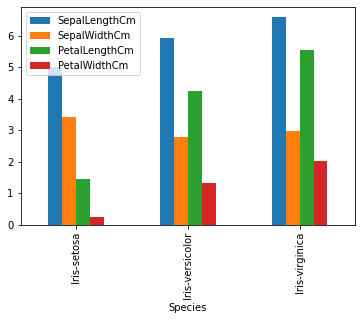

In [23]:
df.groupby('Species').mean().plot(kind='bar')

![title](iris2.png)
เอกสารจาก https://bigdata.go.th/wp-content/uploads/2020/11/iris2.png

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

#### preprocess ก่อน

In [35]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [36]:
X.sample(5)

SepalWidthCm  PetalLengthCm  PetalWidthCm
0             3.5            1.4           0.2
133           2.8            5.1           1.5
80            2.4            3.8           1.1
60            2.0            3.5           1.0
134           2.6            5.6           1.4

In [31]:
from sklearn import preprocessing

In [37]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#### ทดลองใช้ SVM

In [72]:
from sklearn.svm import SVC

In [75]:
sv = SVC(kernel = 'linear', random_state=0)
sv.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

#### ทดสอบ model

In [76]:
predictions = sv.predict(X_test)

In [77]:
predictions

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1])

In [78]:
y_test

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1,
       1])

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

print(cm)

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [112]:
cm.diagonal()

array([13, 19, 12])

#### ทดลองตรวจเอง

In [109]:
cntY = 0
cntN = 0
for i in zip(predictions,y_test):
    if(i[0]==i[1]):
       cntY+=1
    else:
       cntN+=1
print(cntY,cntN)

44 1


In [110]:
cntY/(cntY+cntN)

0.9777777777777777